# Data Science Intern @Lets Grow More - October - BY PRAGATI GUPTA
### Task 10 : ML Facial recognition to detect mood and suggest songs accordingly

In [3]:
import numpy as np
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import regularizers
from keras.utils.vis_utils import plot_model
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from keras.preprocessing.image import ImageDataGenerator, load_img,img_to_array
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.datasets import make_classification
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [4]:
print(os.listdir("train"))

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [5]:
labels = []
for i in os.listdir('train/fear'):
    labels.append(0)
for i in os.listdir('train/happy'):
    labels.append(1)
for i in os.listdir('train/sad'):
    labels.append(2)
for i in os.listdir('train/neutral'):
    labels.append(3)
for i in os.listdir('train/surprise'):
    labels.append(4)
for i in os.listdir('train/angry'):
    labels.append(5)
for i in os.listdir('train/disgust'):
    labels.append(6)
    
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

ValueError: num must be 1 <= num <= 25, not 26

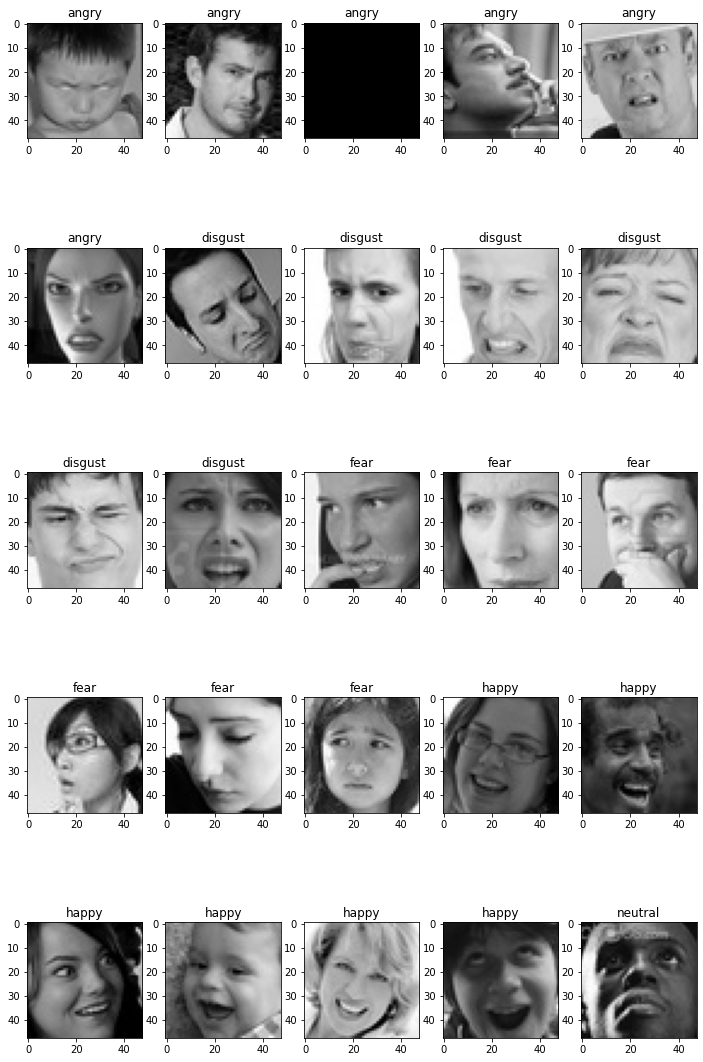

In [6]:
def plot_images(plt):
    img_size = 48
    plt.figure(0, figsize=(12,20))
    c= 0
    for e in os.listdir("train"):
        for i in range(0,6):
            c+= 1
            plt.subplot(5,5,c)
            img = load_img("train/" + e + "/" +os.listdir("train/" + e)[i], target_size=(img_size, img_size))
            plt.imshow(img, cmap="gray")
            plt.title(e)
    plt.tight_layout()
    return plt

plot_images(plt).show()

In [7]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras import layers
from keras.layers import GlobalAveragePooling2D
from keras.models import Model
import keras

In [8]:
pre_trained_model = InceptionV3(input_shape = (250,188,3),   include_top = False,   weights = 'imagenet')

In [9]:
count = 0
for layer in pre_trained_model.layers:
    count=count+1
    
print(count,"layers in pretrained model")

311 layers in pretrained model


In [10]:
for layer in pre_trained_model.layers:
    layer.trainable = False
    
for layer in pre_trained_model.layers[140:]:
    layer.trainable = True
    
np.random.seed(seed=100)

x = pre_trained_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', name='fc1')(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation='softmax', name='predictions')(x)

model = Model(pre_trained_model.input, predictions)
print(model.summary())
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 250, 188, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 124, 93, 32)  864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 124, 93, 32)  96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 124, 93, 32)  0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [11]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.2, 
      height_shift_range=0.2,
      horizontal_flip=True)
train_generator = train_datagen.flow_from_directory("train", target_size = (250,188),
                                             color_mode = 'rgb',
                                             batch_size = 64,
                                             class_mode = 'categorical',
                                             shuffle = True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory("test", target_size = (250,188),
                                             color_mode = 'rgb',
                                             batch_size = 64,
                                             class_mode = 'categorical',
                                             shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [12]:
train_generator.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [13]:
s = train_generator.n // train_generator.batch_size
v = test_generator.n // test_generator.batch_size

lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=3, verbose=1)
cptr = ModelCheckpoint("model.h5", monitor='val_loss', verbose=1, save_best_only=True)
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3,   verbose=1, restore_best_weights=True)
log_dir = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger = CSVLogger('training.log')

callbacks = [cptr, lr_reducer, csv_logger]

history = model.fit(train_generator,steps_per_epoch=s, epochs=10,validation_data=test_generator,validation_steps=v,callbacks=callbacks)

Epoch 1/10
448/448 [==============================] - 2327s 5s/step - loss: 1.5429 - accuracy: 0.3957 - val_loss: 1.3256 - val_accuracy: 0.5170

Epoch 00001: val_loss improved from inf to 1.32563, saving model to model.h5
Epoch 2/10
448/448 [==============================] - 2285s 5s/step - loss: 1.2186 - accuracy: 0.5393 - val_loss: 1.1066 - val_accuracy: 0.5765

Epoch 00002: val_loss improved from 1.32563 to 1.10661, saving model to model.h5
Epoch 3/10
448/448 [==============================] - 2362s 5s/step - loss: 1.1255 - accuracy: 0.5825 - val_loss: 1.0440 - val_accuracy: 0.6059

Epoch 00003: val_loss improved from 1.10661 to 1.04402, saving model to model.h5
Epoch 4/10
448/448 [==============================] - 2449s 5s/step - loss: 1.0718 - accuracy: 0.6025 - val_loss: 1.0183 - val_accuracy: 0.6197

Epoch 00004: val_loss improved from 1.04402 to 1.01830, saving model to model.h5
Epoch 5/10
448/448 [==============================] - 2681s 6s/step - loss: 1.0271 - accuracy: 0.618

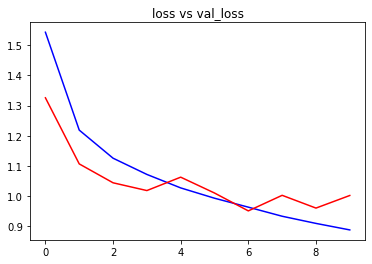

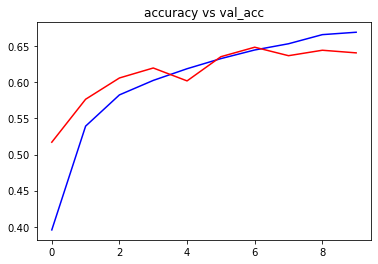

In [14]:
plt.plot(history.history['loss'], color='b')  
plt.plot(history.history['val_loss'], color='r')  
plt.title("loss vs val_loss")
plt.show()
plt.plot(history.history['accuracy'], color='b')
plt.plot(history.history['val_accuracy'], color='r') 
plt.title("accuracy vs val_acc")
plt.show()